In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  y


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.21198347128386916, 0.9298731365369207],
 'diameter': 57.92227954182835,
 'confidence': 0.09507458143696404,
 'timestamp': 9667.550981,
 'sphere': {'center': [-0.18801026877744603,
   0.0342980767837713,
   37.34685358201592],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [94.43376398374427, 96.189621702069],
  'axes': [189.05185141268998, 189.05185141268998],
  'angle': 0.0},
 'circle_3d': {'center': [-5.82600916810192,
   -8.487473321687906,
   35.45149592621423],
  'normal': [-0.5425166970359665, -0.8200078351466795, -0.18238087546462073],
  'radius': 2.7584102704852027},
 'diameter_3d': 5.516820540970405,
 'ellipse': {'center': [40.700826486502876, 13.464357784911215],
  'axes': [9.325651981347221, 57.92227954182835],
  'angle': 57.10664908465128},
 'location': [40.700826486502876, 13.464357784911215],
 'model_confidence': 1.0,
 'theta': 2.5322210348023315,
 'phi': -2.81728624520

Text(0.5, 0, 'Pupil timestamp (s)')

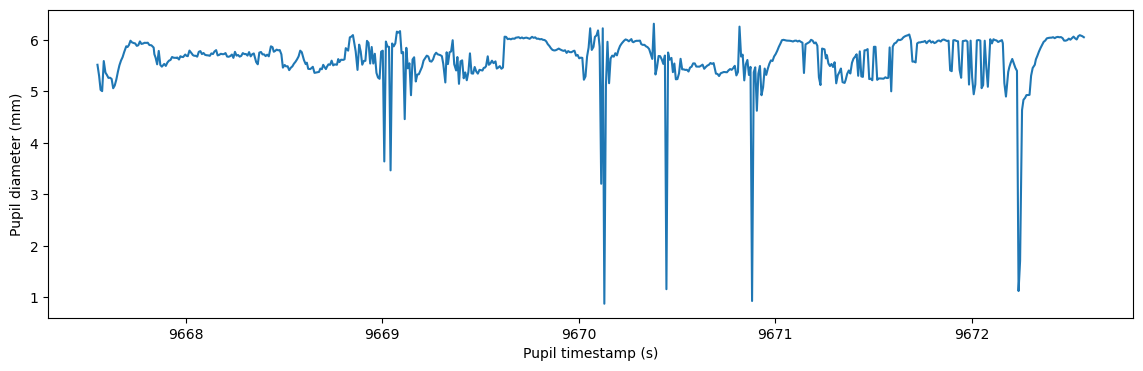

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')